### Sentiment analysis and Intent classification using social media texts in Romanian language
- texts are translated to english
- pre-trained fine-tuned RoBERTa model is applied
- DistilBERT is trained for intent classification and applied
- results are printed, evaluated and visualized
- analytics are generated based on the predicted labels

## BUDALA Cristian, Bachelor's thesis 2024, FABIZ-ASE


# 1. Sentiment Analysis

## 1.1. Installing libraries, loading the data, setting up the SA model and Translation API

In [15]:
import pandas as pd
from transformers import AutoTokenizer, AutoModelForSequenceClassification, TrainingArguments, Trainer, pipeline
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix
from scipy.special import softmax
from googletrans import Translator
from tqdm.notebook import tqdm
import torch
import seaborn as sns
import matplotlib.pyplot as plt

# Setting the plot style
plt.style.use('ggplot')

# Check for GPU acceleration
def get_device():
    return torch.device("cuda" if torch.cuda.is_available() else "cpu")

device = get_device()

# Loading the Evaluation data
df = pd.read_excel(r"C:\Users\crist\Desktop\licenta resurse\Resurse\test-data.xlsx")
df.head()

# Loading fine-tuned RoBERTa model and tokenizer for Sentiment Analysis
tokenizer = AutoTokenizer.from_pretrained("bharadwajkg/finetuning-cardiffnlp-twitter-roberta-base-sentiment")
model = AutoModelForSequenceClassification.from_pretrained("bharadwajkg/finetuning-cardiffnlp-twitter-roberta-base-sentiment").to(device)


# Initialize the Google Translate API
translator = Translator()

# Function to translate Romanian text to English
def translate_text(text):
    try:
        translated = translator.translate(text, dest='en').text
        return translated
    except Exception as e:
        return text

# Apply translation with a progress bar
tqdm.pandas()
df['translated_text'] = df['text'].progress_apply(translate_text)

# Function to get sentiment predictions
def get_sentiment_label(example):
    encoded_text = tokenizer(example, truncation=True, padding='max_length', max_length=128, return_tensors='pt').to(device)
    with torch.no_grad():
        output = model(**encoded_text)
    scores = output.logits[0].detach().cpu().numpy()
    scores = softmax(scores)
    if scores[2] > scores[0] and scores[2] > scores[1]:
        return 1  # Positive
    elif scores[0] > scores[2] and scores[0] > scores[1]:
        return -1  # Negative
    else:
        return 0  # Neutral

# Apply sentiment analysis with a progress bar
tqdm.pandas()
df['predicted_sentiment'] = df['translated_text'].progress_apply(get_sentiment_label)

C:\Users\crist\anaconda3\Lib\site-packages\huggingface_hub\file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

## 1.2. Creating the Confusion Matrix for the Sentiment Analysis results

Accuracy: 0.90
Mean Absolute Error: 0.11


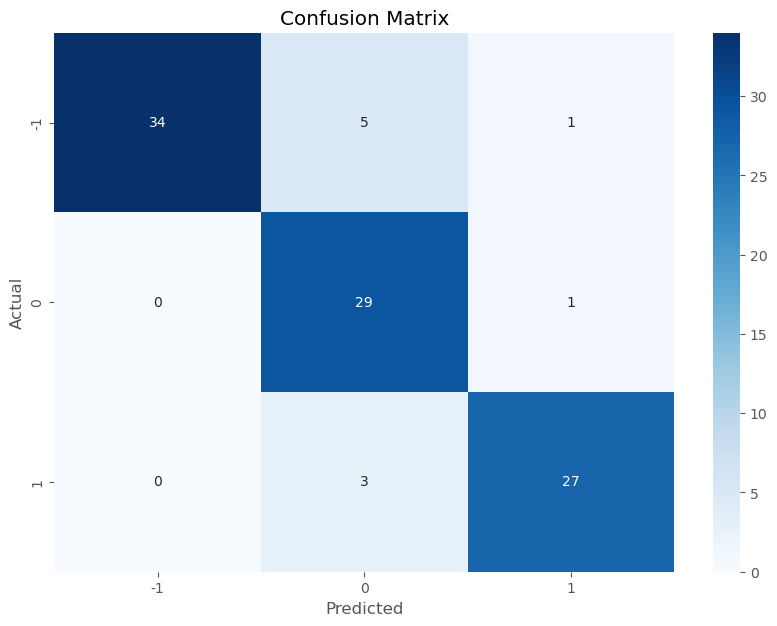

In [30]:
from sklearn.metrics import accuracy_score, mean_absolute_error, confusion_matrix

# Calculate accuracy based on labels
accuracy = accuracy_score(df['Sentiment'], df['predicted_sentiment'])

# Calculate mean absolute error based on labels
mae = mean_absolute_error(df['Sentiment'], df['predicted_sentiment'])

# Generate the confusion matrix
conf_matrix = confusion_matrix(df['Sentiment'], df['predicted_sentiment'])

# Print evaluation metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"Mean Absolute Error: {mae:.2f}")

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=[-1, 0, 1], yticklabels=[-1, 0, 1])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## 1.3. Display the predicted sentiments on the dataset

In [31]:
# Display the comparison between annotated and predicted sentiment
pd.set_option('display.max_colwidth', 150)
pd.set_option('display.max_rows', 150)
comparison_df = df[['text', 'translated_text', 'Sentiment', 'predicted_sentiment']]
comparison_df

,text,translated_text,Sentiment,predicted_sentiment
0,"Doresc sa imi recomandati crema zi si de noapte pentru persoana in varsta , va mulțumesc !","I want to recommend my day and night cream for the older person, thank you!",1,1
1,"Am cautat apa micelara cu textura de lapte. De ce nu mai exista pe nicăieri? Am cautat peste tot, inclusiv online, și nu am gasit-o decât pe 2 sit...","I searched the micellar water with milk texture.Why didn't there anywhere?I searched everywhere, including online, and I only found it on 2 sites ...",-1,-1
2,Păcat. Era singurul produs care ma ajuta cu uscăciunea și demachia în același timp și lasă și o textura lejera pe fata. Eu am tenul mai dificil. ...,Sin.It was the only product that helped me with dryness and makeup at the same time and leaves a light texture on the face.I have more difficult s...,0,1
3,"Produsele din gama noua ma intereseaza. Le-am cautat prin magazine, mall dar nu au Brand_B !!!! Unde sa le gasesc, mai ales mastile ??","The products in the new range are interested.I searched them through shops, mall but they don't have brand_b !!!!Where to find them, especially ma...",0,0
4,Vreau sa vad INCI pentru acest produs. Daca are alchool denat si parfum nu voi cumpara.,I want to see inch for this product.If it has an alcohol distorted and perfume I will not buy.,-1,-1
5,"Am si eu o intrebare, de ce nu aduceti pe pietele din Romania si sampon pentru par gras? Cele mai bune produse care le aveti nu se comercializeaza...","I also have a question, why don't you bring to the Romanian markets and oily hair shampoo?The best products you have are not marketed at all in th...",-1,-1
6,știu. asta era si ideea. de ce nu le aduceți e întrebarea?,know.That was the idea.Why don't you bring them the question?,0,0
7,Super rimel. Imi vreau banii înapoi. N.am mai folosit Brand_C pana acum. Dar nici nu voi mai folosi.,Super mascara.I want my money back.N. I have used brand_c until now.But I will not use it anymore.,-1,-1
8,Preț,Price,0,0
9,Aceasta este sub așteptări.,This is below expectations.,-1,-1


## 1.4. Display mismatched sentiments

In [32]:
# Filter the dataframe to show only the rows where 'Sentiment' and 'predicted_sentiment' are different
mismatched_sentiments = comparison_df[comparison_df['Sentiment'] != comparison_df['predicted_sentiment']]

# Display the filtered dataframe
mismatched_sentiments


,text,translated_text,Sentiment,predicted_sentiment
2,Păcat. Era singurul produs care ma ajuta cu uscăciunea și demachia în același timp și lasă și o textura lejera pe fata. Eu am tenul mai dificil. ...,Sin.It was the only product that helped me with dryness and makeup at the same time and leaves a light texture on the face.I have more difficult s...,0,1
22,crema e favoritaaa mea,crema by Favoripa things,1,0
27,"DA! buna idee, ca ma lupt cu buzele crăpate de câteva săptămâni. Perioada de iarna e foarte dificila pentru mine din acest punct de vedere.","YES!Good idea, I struggle with the lips cracked for a few weeks.The winter period is very difficult for me from this point of view.",1,0
31,O adooor,O adooor,1,0
38,Bleah buboaso,Bleah buboaso,-1,0
44,La muie,To the blowjob,-1,0
67,Fra esti panarama mancatias,FRA you are the panarama mancatias,-1,0
69,Futuva-n gură de gay,Futuva in the mouth of gay,-1,0
91,sami bag pl in produsele voastre!! apa de ploaie! Cum ac retur si cum imi iau banii inapoi? Toti!!!,Sami bag pl in your products !!Rain water!How do AC return and how do I get my money back?All!!!,-1,0
93,"Era bine daca noul spf venea si intr-o formula gel, pentru ten gras.",It was good if the new SPF came in a gel formula for oily skin.,-1,1


# 2. Intent Classification

## 2.1. Creating the Intent Classifier

In [16]:
import pandas as pd
from transformers import AutoTokenizer, AutoModelForSequenceClassification, TrainingArguments, Trainer
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
import torch
from tqdm.notebook import tqdm
import seaborn as sns
import matplotlib.pyplot as plt

# GPU Acceleration
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Importing the intent classification data
intent_df = pd.read_csv(r"C:\Users\crist\Desktop\licenta resurse\Resurse\intent-data.csv")

# Define intents and convert to numeric labels
intents = intent_df['intent'].unique().tolist()

intent_df['intent_label'] = intent_df['intent'].apply(lambda x: intents.index(x))

# Convert to Hugging Face Dataset
from datasets import Dataset
dataset = Dataset.from_pandas(intent_df[['text', 'intent_label']])

# Load tokenizer
intent_model_name = "distilbert-base-uncased"
intent_tokenizer = AutoTokenizer.from_pretrained(intent_model_name)

# Tokenize dataset
def tokenize_function(examples):
    return intent_tokenizer(examples['text'], truncation=True, padding='max_length', max_length=128)

tokenized_datasets = dataset.map(tokenize_function, batched=True)

# Split the dataset into train and test sets
train_test_split = tokenized_datasets.train_test_split(test_size=0.07)
train_dataset = train_test_split['train']
eval_dataset = train_test_split['test']

# Define the columns used for training
train_dataset = train_dataset.map(lambda examples: {'labels': examples['intent_label']})
eval_dataset = eval_dataset.map(lambda examples: {'labels': examples['intent_label']})

train_dataset.set_format(type='torch', columns=['input_ids', 'attention_mask', 'labels'])
eval_dataset.set_format(type='torch', columns=['input_ids', 'attention_mask', 'labels'])

# Load pre-trained model for intent classification
intent_model = AutoModelForSequenceClassification.from_pretrained(intent_model_name, num_labels=len(intents)).to(device)

# Define training arguments for intent classification
training_args = TrainingArguments(
    output_dir="./results",
    evaluation_strategy="epoch",
    learning_rate=3e-5,  
    per_device_train_batch_size=16,  
    per_device_eval_batch_size=16,
    gradient_accumulation_steps=2,  
    num_train_epochs=5,  
    weight_decay=0.01,
    fp16=torch.cuda.is_available(),  
    no_cuda=not torch.cuda.is_available(),  
    logging_dir='./logs',  
    logging_steps=50,  
    report_to="none"  
)

# Define a function to compute evaluation metrics
def compute_metrics(p):
    preds = p.predictions.argmax(-1)
    precision, recall, f1, _ = precision_recall_fscore_support(p.label_ids, preds, average='weighted')
    acc = accuracy_score(p.label_ids, preds)
    return {"accuracy": acc, "f1": f1, "precision": precision, "recall": recall}

# Define the Trainer for intent classification
trainer = Trainer(
    model=intent_model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=eval_dataset,
    tokenizer=intent_tokenizer,
    compute_metrics=compute_metrics
)

# Train the model for intent classification
trainer.train()

# Evaluate the intent classification model
eval_results = trainer.evaluate()

# Print evaluation results
print(eval_results)

# Function to predict intent with threshold for 'Others'
def predict_intent(text, threshold=0.5):
    inputs = intent_tokenizer(text, return_tensors="pt", truncation=True, padding='max_length', max_length=128).to(device)
    with torch.no_grad():
        outputs = intent_model(**inputs)
    probs = outputs.logits.softmax(dim=-1)
    max_prob = probs.max().item()
    if max_prob < threshold:
        return "Others"
    else:
        predicted_label = probs.argmax().item()
        predicted_intent = intents[predicted_label]
        return predicted_intent

# Apply intent classifier on the translated text
df['predicted_intent'] = df['translated_text'].progress_apply(lambda x: predict_intent(x, threshold=0.6))



C:\Users\crist\anaconda3\Lib\site-packages\huggingface_hub\file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


Map:   0%|          | 0/6500 [00:00<?, ? examples/s]

Map:   0%|          | 0/6044 [00:00<?, ? examples/s]

Map:   0%|          | 0/456 [00:00<?, ? examples/s]

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.weight', 'pre_classifier.weight', 'pre_classifier.bias', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
C:\Users\crist\anaconda3\Lib\site-packages\accelerate\accelerator.py:446: FutureWarning: Passing the following arguments to `Accelerator` is deprecated and will be removed in version 1.0 of Accelerate: dict_keys(['dispatch_batches']). Please pass an `accelerate.DataLoaderConfiguration` instead: 
dataloader_config = DataLoaderConfiguration(dispatch_batches=None)
  warnings.warn(
You're using a DistilBertTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


Epoch,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall
1,0.985900,0.419818,0.923246,0.922718,0.924531,0.923246
2,0.153700,0.084480,0.984649,0.984458,0.985444,0.984649
3,0.039900,0.042169,0.986842,0.986777,0.987114,0.986842
4,0.013400,0.020020,0.993421,0.993408,0.993737,0.993421
5,0.011300,0.019460,0.993421,0.993413,0.993757,0.993421


{'eval_loss': 0.01945977471768856, 'eval_accuracy': 0.993421052631579, 'eval_f1': 0.9934130105394109, 'eval_precision': 0.9937573713696005, 'eval_recall': 0.993421052631579, 'eval_runtime': 1.0228, 'eval_samples_per_second': 445.854, 'eval_steps_per_second': 28.355, 'epoch': 5.0}


  0%|          | 0/100 [00:00<?, ?it/s]

## 2.2. Display the predicted intents on the dataset

In [17]:
pd.set_option('display.max_colwidth', 200)
pd.set_option('display.max_rows', 500)
intent_comparison_df = df[['text', 'translated_text', 'Intent', 'predicted_intent']]
intent_comparison_df

,text,translated_text,Intent,predicted_intent
0,"Doresc sa imi recomandati crema zi si de noapte pentru persoana in varsta , va mulțumesc !","I want to recommend my day and night cream for the older person, thank you!",Product Inquiry-Recommendations,Product Inquiry-Recommendations
1,"Am cautat apa micelara cu textura de lapte. De ce nu mai exista pe nicăieri? Am cautat peste tot, inclusiv online, și nu am gasit-o decât pe 2 site-uri unde este dublu prețul.","I searched the micellar water with milk texture.Why didn't there anywhere?I searched everywhere, including online, and I only found it on 2 sites where the price is double.",Product Inquiry-Availability,Product Inquiry-Availability
2,"Păcat. Era singurul produs care ma ajuta cu uscăciunea și demachia în același timp și lasă și o textura lejera pe fata. Eu am tenul mai dificil. Câteodată gras, alteori uscat. Cred ca e mai degra...","Sin.It was the only product that helped me with dryness and makeup at the same time and leaves a light texture on the face.I have more difficult skin.Sometimes fatty, sometimes dry.I think it's ra...",Feedback-Complaints,Feedback-Complaints
3,"Produsele din gama noua ma intereseaza. Le-am cautat prin magazine, mall dar nu au Brand_B !!!! Unde sa le gasesc, mai ales mastile ??","The products in the new range are interested.I searched them through shops, mall but they don't have brand_b !!!!Where to find them, especially masks ??",Product Inquiry-Availability,Product Inquiry-Availability
4,Vreau sa vad INCI pentru acest produs. Daca are alchool denat si parfum nu voi cumpara.,I want to see inch for this product.If it has an alcohol distorted and perfume I will not buy.,Product Inquiry-Ingredients,Product Inquiry-Ingredients
5,"Am si eu o intrebare, de ce nu aduceti pe pietele din Romania si sampon pentru par gras? Cele mai bune produse care le aveti nu se comercializeaza deloc in țara.","I also have a question, why don't you bring to the Romanian markets and oily hair shampoo?The best products you have are not marketed at all in the country.",Product Inquiry-Availability,Product Inquiry-Availability
6,știu. asta era si ideea. de ce nu le aduceți e întrebarea?,know.That was the idea.Why don't you bring them the question?,Product Inquiry-Availability,Product Inquiry-Availability
7,Super rimel. Imi vreau banii înapoi. N.am mai folosit Brand_C pana acum. Dar nici nu voi mai folosi.,Super mascara.I want my money back.N. I have used brand_c until now.But I will not use it anymore.,Customer Support-Returns and Refunds,Customer Support-Returns and Refunds
8,Preț,Price,Product Inquiry-Price,Product Inquiry-Price
9,Aceasta este sub așteptări.,This is below expectations.,Feedback-Complaints,Product Inquiry-Price


## 2.3. Display the mismatched intents

In [18]:
# Filter the dataframe to show only the rows where 'Sentiment' and 'predicted_sentiment' are different
mismatched_intents = intent_comparison_df[intent_comparison_df['Intent'] != intent_comparison_df['predicted_intent']]

# Display the filtered dataframe
mismatched_intents

,text,translated_text,Intent,predicted_intent
9,Aceasta este sub așteptări.,This is below expectations.,Feedback-Complaints,Product Inquiry-Price
15,"Ptr mine funcționează perfect,o folosesc de câțiva ani impreuna cu un gel de curatare și mi-a estompat foarte mult din riduri. Și am peste 50 de ani !!! Încercați mai multe produse pana găsiți ce...","For me it works perfectly, I have been using it for a few years with a cleaning gel and it has fade a lot of wrinkles.And I am over 50 years old !!!Try more products until you find something that ...",Feedback-Compliments,Product Inquiry-Availability
17,Cum pot sa fac comanda?,How can I order?,Customer Support-Order Status,Others
22,crema e favoritaaa mea,crema by Favoripa things,Feedback-Compliments,Product Inquiry-Ingredients
25,Ieri ati avut 30% reducere insa n am apucat sa comand nimic. Astazi... woooow! Aveti 25%. Nu inteleg dar probabil nici nu trebuie,Yesterday you had a 30% discount but I didn't order anything.Today ... Woooow!You have 25%.I do not understand but probably do not have to,Feedback-Complaints,Product Inquiry-Availability
28,Brandul vostru este atat de pregatit incat la o saptamana si jumatate dupa plasarea unei comenzi te anunta ca produsul nu mai este in stoc si comanda a fost anulata,Your brand is so prepared that a week and a half after placing an order announces that the product is no longer in stock and the order has been canceled,Feedback-Complaints,Others
29,Datorita sfaturilor Dumneavoastră cat si a produselor cosmetice parul meu este acum mult mai sănătos. Va urmăresc cu mare interes și entuziasm. Continuati ceea ce faceti!,Due to your tips and cosmetics my hair is now much healthier.I follow you with great interest and enthusiasm.Continue what you do!,Feedback-Compliments,Others
30,Am asteptat cu drag acest episod. Bravo voua,I waited for this episode.Good for you,Feedback-Compliments,Others
34,"Vreau un șampon, masca și ser!","I want a shampoo, mask and serum!",Customer Support-Order,Others
38,Bleah buboaso,Bleah buboaso,Others,Product Inquiry-Ingredients


In [19]:
mismatched_intents.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27 entries, 9 to 97
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   text              27 non-null     object
 1   translated_text   27 non-null     object
 2   Intent            27 non-null     object
 3   predicted_intent  27 non-null     object
dtypes: object(4)
memory usage: 1.1+ KB


## 2.4. Plot the training metrics

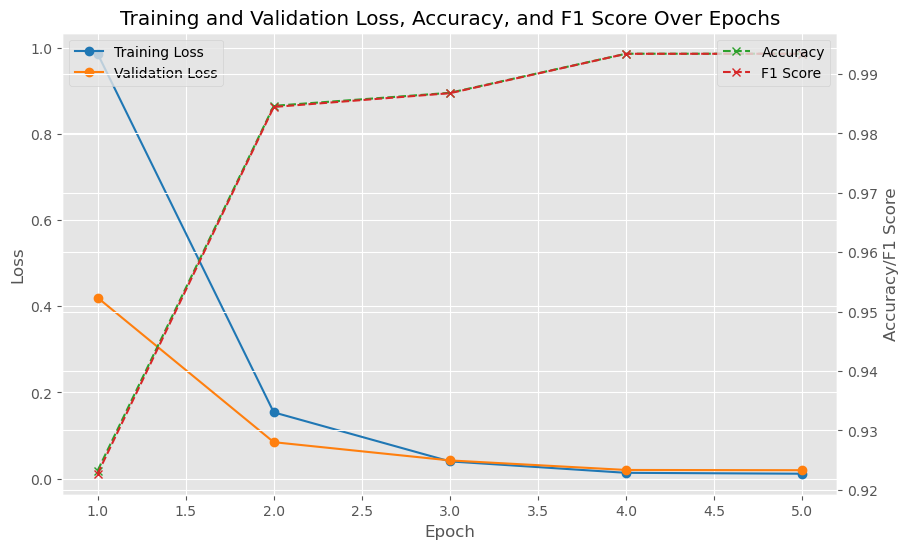

In [24]:
import matplotlib.pyplot as plt


epochs = [1, 2, 3, 4, 5]
training_loss = [0.985900, 0.153700, 0.039900, 0.013400, 0.011300]
validation_loss = [0.419818, 0.084480, 0.042169, 0.020020, 0.019460]
accuracy = [0.923246, 0.984649, 0.986842, 0.993421, 0.993421]
f1 = [0.922718, 0.984458, 0.986777, 0.993408, 0.993413]

# Create subplots
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot Training and Validation Loss
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss')
ax1.plot(epochs, training_loss, label='Training Loss', color='tab:blue', marker='o')
ax1.plot(epochs, validation_loss, label='Validation Loss', color='tab:orange', marker='o')
ax1.legend(loc='upper left')
ax1.grid(True)

# Create another y-axis for Accuracy and F1 Score
ax2 = ax1.twinx()
ax2.set_ylabel('Accuracy/F1 Score')
ax2.plot(epochs, accuracy, label='Accuracy', color='tab:green', linestyle='--', marker='x')
ax2.plot(epochs, f1, label='F1 Score', color='tab:red', linestyle='--', marker='x')
ax2.legend(loc='upper right')


plt.title('Training and Validation Loss, Accuracy, and F1 Score Over Epochs')


plt.show()


In [37]:
df.head()

,Brand,text,PlatformName,Sentiment,Type of case,Intent,translated_text,predicted_sentiment,predicted_intent
0,Brand_A,"Doresc sa imi recomandati crema zi si de noapte pentru persoana in varsta , va mulțumesc !",Facebook,1,Comment,Product Inquiry-Recommendations,"I want to recommend my day and night cream for the older person, thank you!",1,Product Inquiry-Recommendations
1,Brand_B,"Am cautat apa micelara cu textura de lapte. De ce nu mai exista pe nicăieri? Am cautat peste tot, inclusiv online, și nu am gasit-o decât pe 2 sit...",Facebook,-1,Comment,Product Inquiry-Availability,"I searched the micellar water with milk texture.Why didn't there anywhere?I searched everywhere, including online, and I only found it on 2 sites ...",-1,Product Inquiry-Availability
2,Brand_B,Păcat. Era singurul produs care ma ajuta cu uscăciunea și demachia în același timp și lasă și o textura lejera pe fata. Eu am tenul mai dificil. ...,Facebook,0,Comment,Feedback-Complaints,Sin.It was the only product that helped me with dryness and makeup at the same time and leaves a light texture on the face.I have more difficult s...,1,Feedback-Complaints
3,Brand_B,"Produsele din gama noua ma intereseaza. Le-am cautat prin magazine, mall dar nu au Brand_B !!!! Unde sa le gasesc, mai ales mastile ??",Facebook,0,Comment,Product Inquiry-Availability,"The products in the new range are interested.I searched them through shops, mall but they don't have brand_b !!!!Where to find them, especially ma...",0,Product Inquiry-Availability
4,Brand_B,Vreau sa vad INCI pentru acest produs. Daca are alchool denat si parfum nu voi cumpara.,Facebook,-1,Comment,Product Inquiry-Ingredients,I want to see inch for this product.If it has an alcohol distorted and perfume I will not buy.,-1,Product Inquiry-Ingredients


# 3. Business Analytics

## 3.1. Sentiment Distribution by Intent

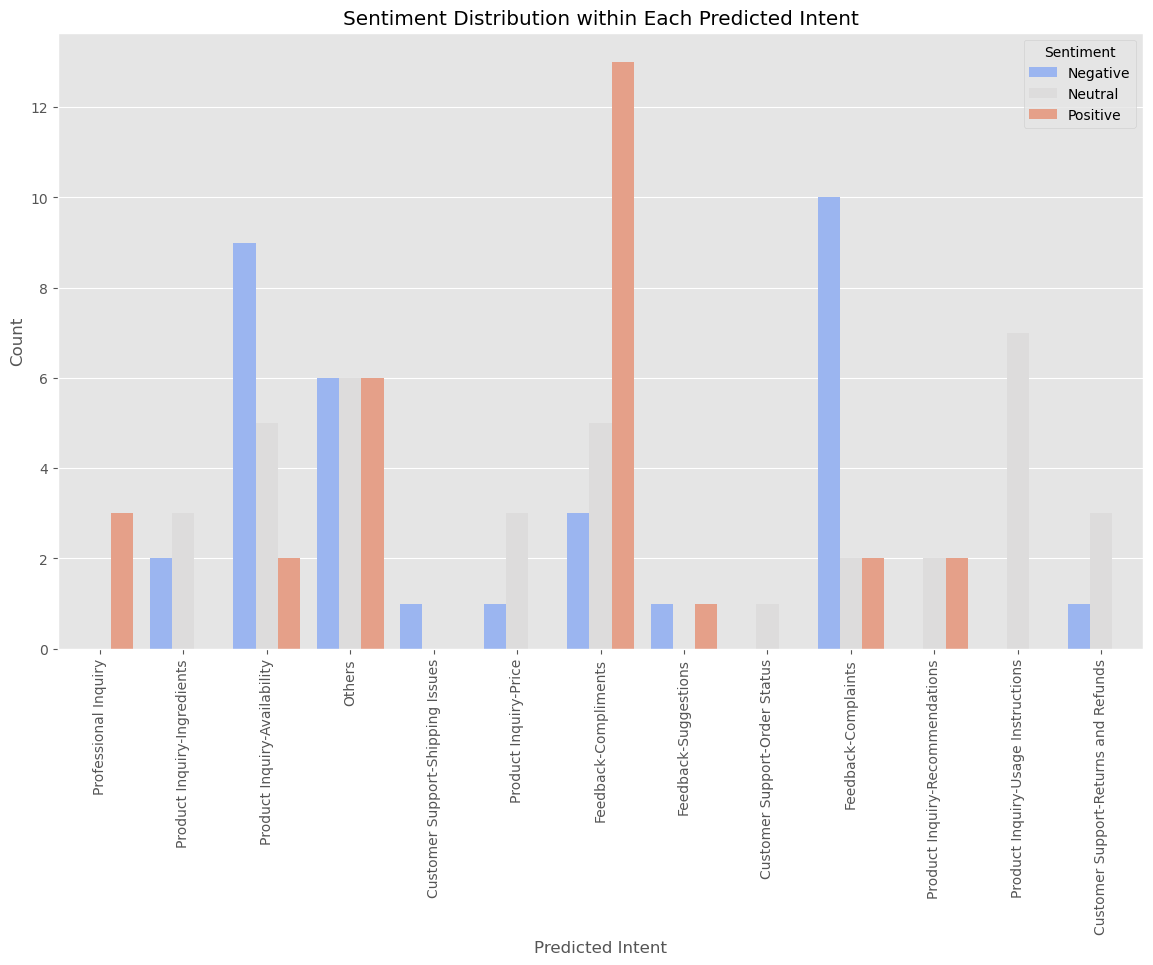

In [33]:
plt.figure(figsize=(14, 8))
sns.countplot(x='predicted_intent', hue='predicted_sentiment', data=df, palette='coolwarm', order=intents)
plt.xlabel('Predicted Intent')
plt.ylabel('Count')
plt.title('Sentiment Distribution within Each Predicted Intent')
plt.xticks(rotation=90)
plt.legend(title='Sentiment', loc='upper right', labels=['Negative', 'Neutral', 'Positive'])
plt.show()

## 3.2. Intent Classification confidence

  0%|          | 0/100 [00:00<?, ?it/s]

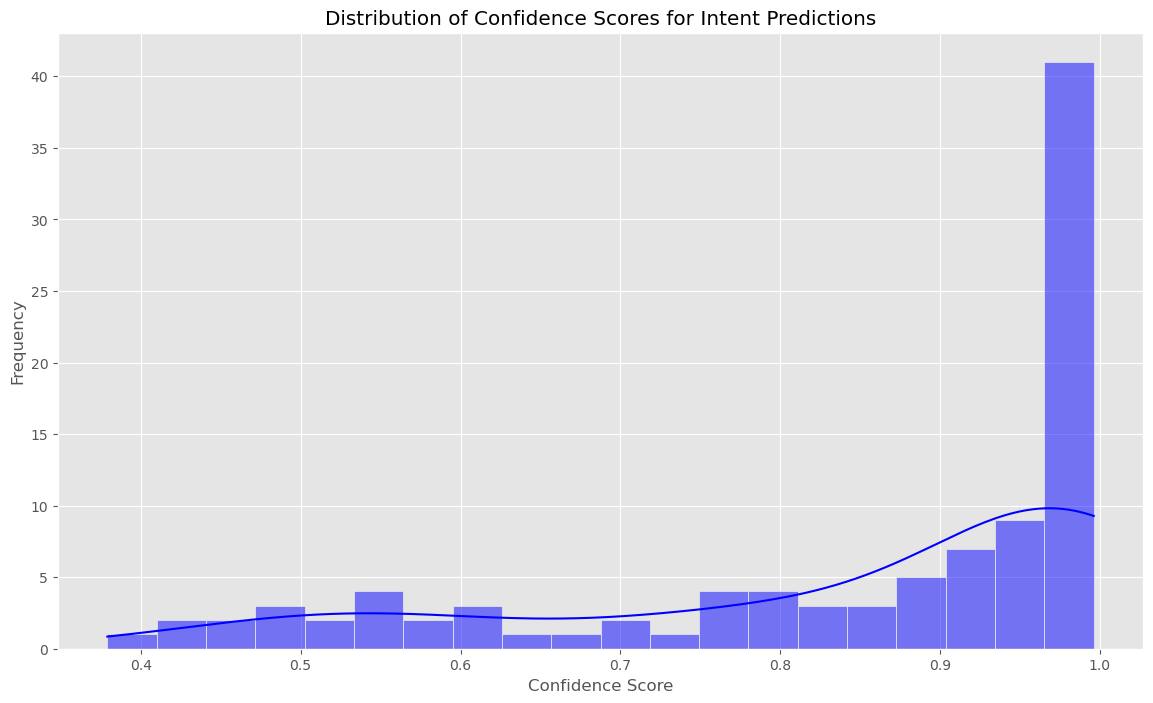

In [39]:
def get_intent_confidence(text):
    inputs = intent_tokenizer(text, return_tensors="pt", truncation=True, padding='max_length', max_length=128).to(device)
    with torch.no_grad():
        outputs = intent_model(**inputs)
    probs = outputs.logits.softmax(dim=-1).cpu().numpy().flatten()
    return probs.max()

df['intent_confidence'] = df['translated_text'].progress_apply(get_intent_confidence)

plt.figure(figsize=(14, 8))
sns.histplot(df['intent_confidence'], bins=20, kde=True, color='blue')
plt.xlabel('Confidence Score')
plt.ylabel('Frequency')
plt.title('Distribution of Confidence Scores for Intent Predictions')
plt.show()

## 3.3. Intent confidence by Sentiment

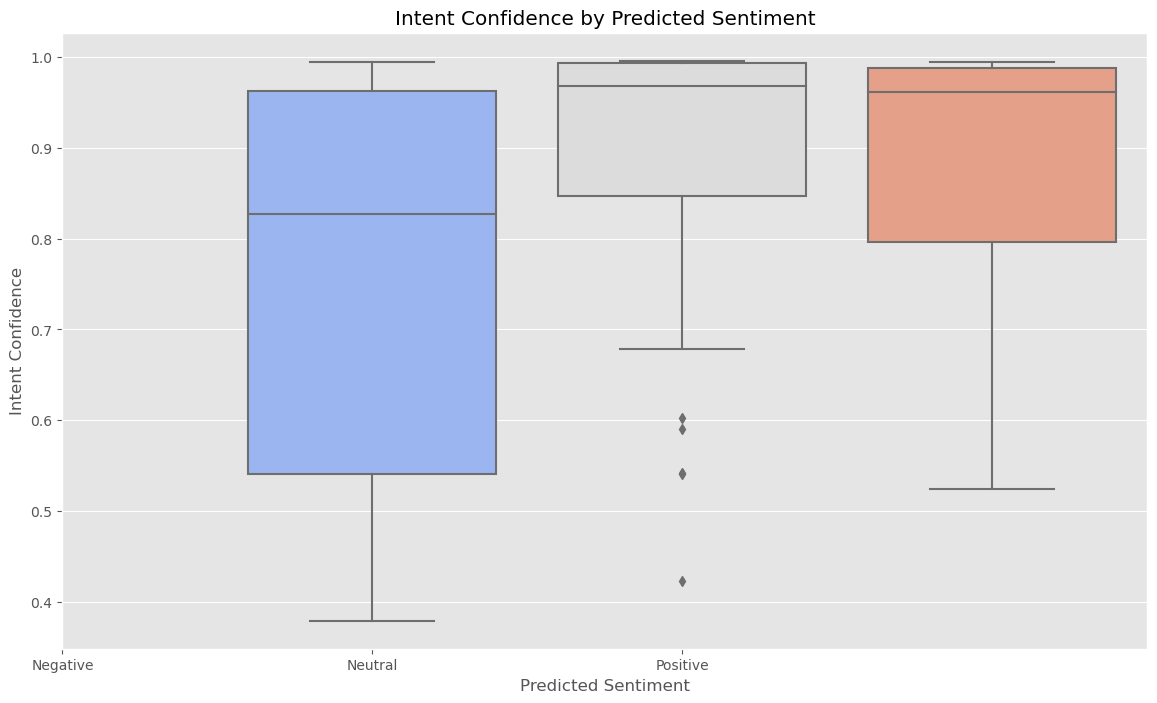

In [40]:
plt.figure(figsize=(14, 8))
sns.boxplot(x='predicted_sentiment', y='intent_confidence', data=df, palette='coolwarm')
plt.xlabel('Predicted Sentiment')
plt.ylabel('Intent Confidence')
plt.title('Intent Confidence by Predicted Sentiment')
plt.xticks(ticks=[-1, 0, 1], labels=['Negative', 'Neutral', 'Positive'])
plt.show()

## 3.4. Sentiment Scores Heatmap by Intent

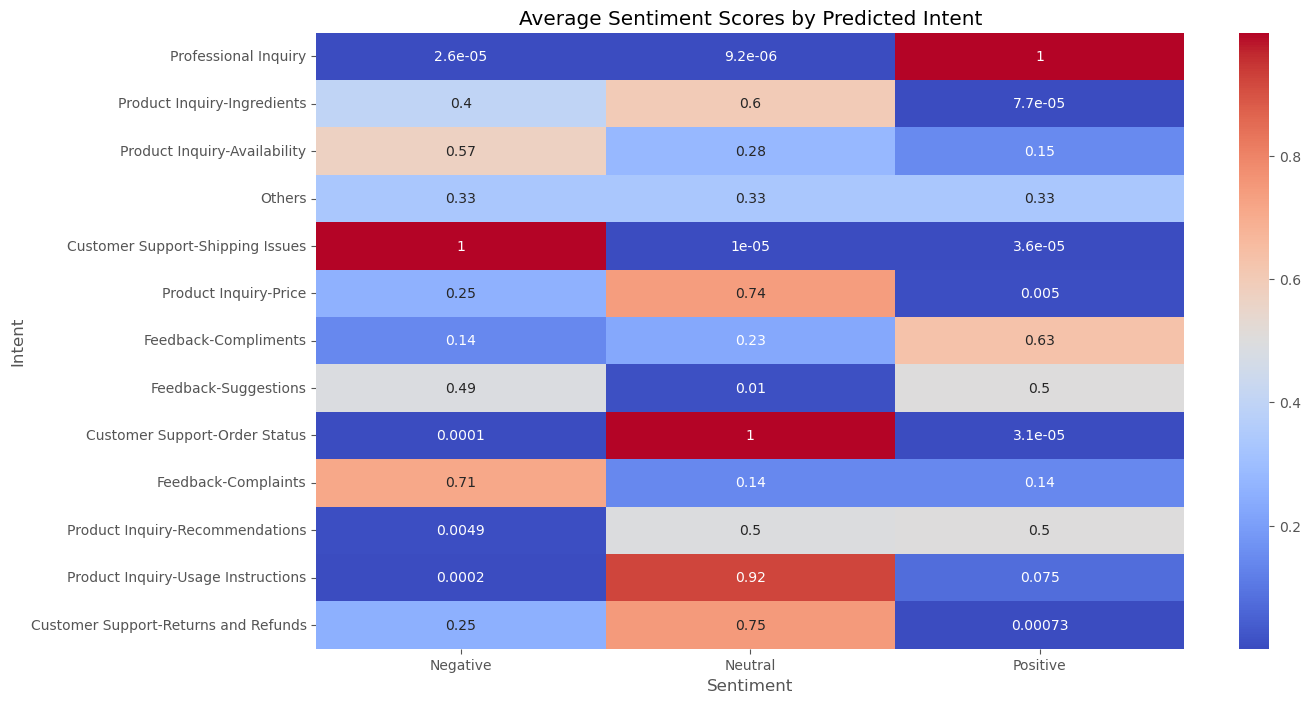

In [41]:
sentiment_scores_df = pd.concat([df['predicted_intent'], sentiment_df], axis=1)
sentiment_scores_mean = sentiment_scores_df.groupby('predicted_intent').mean().reindex(intents)

plt.figure(figsize=(14, 8))
sns.heatmap(sentiment_scores_mean, annot=True, cmap='coolwarm', cbar=True, xticklabels=['Negative', 'Neutral', 'Positive'], yticklabels=intents)
plt.xlabel('Sentiment')
plt.ylabel('Intent')
plt.title('Average Sentiment Scores by Predicted Intent')
plt.show()

## 3.5. Sentiment Distribution by Brand

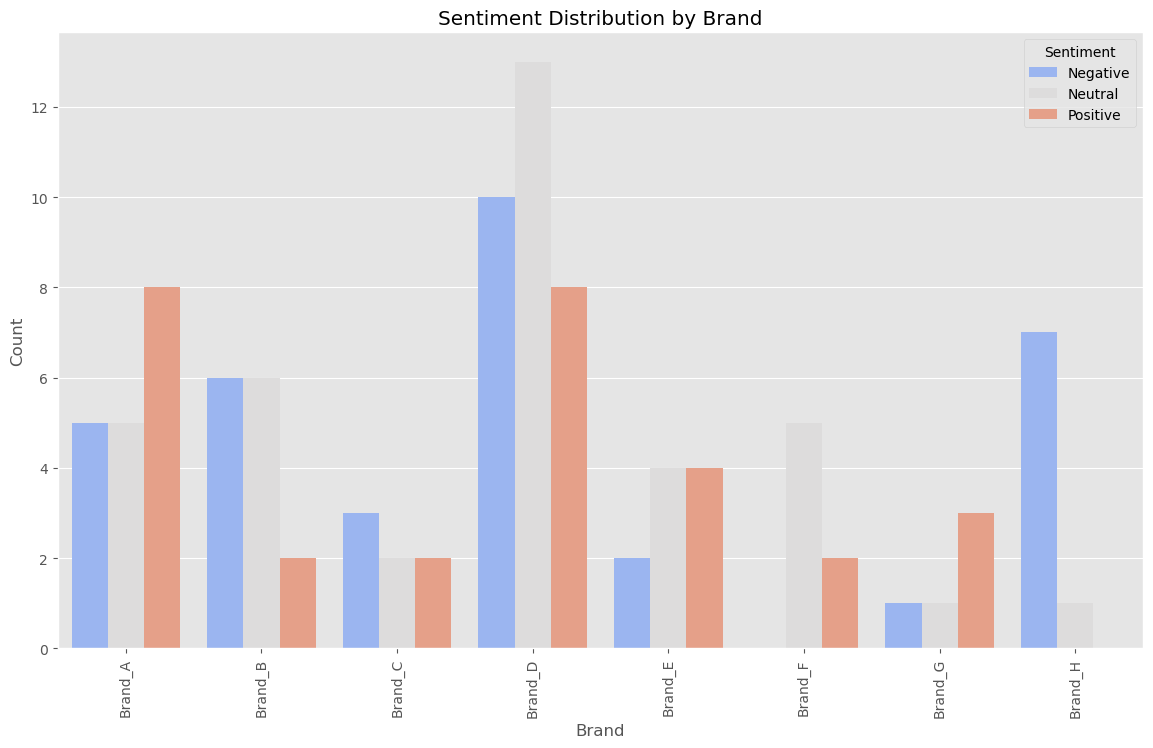

In [42]:
plt.figure(figsize=(14, 8))
sns.countplot(x='Brand', hue='predicted_sentiment', data=df, palette='coolwarm')
plt.xlabel('Brand')
plt.ylabel('Count')
plt.title('Sentiment Distribution by Brand')
plt.legend(title='Sentiment', loc='upper right', labels=['Negative', 'Neutral', 'Positive'])
plt.xticks(rotation=90)
plt.show()

## 3.6. Sentiment Distribution by Platform

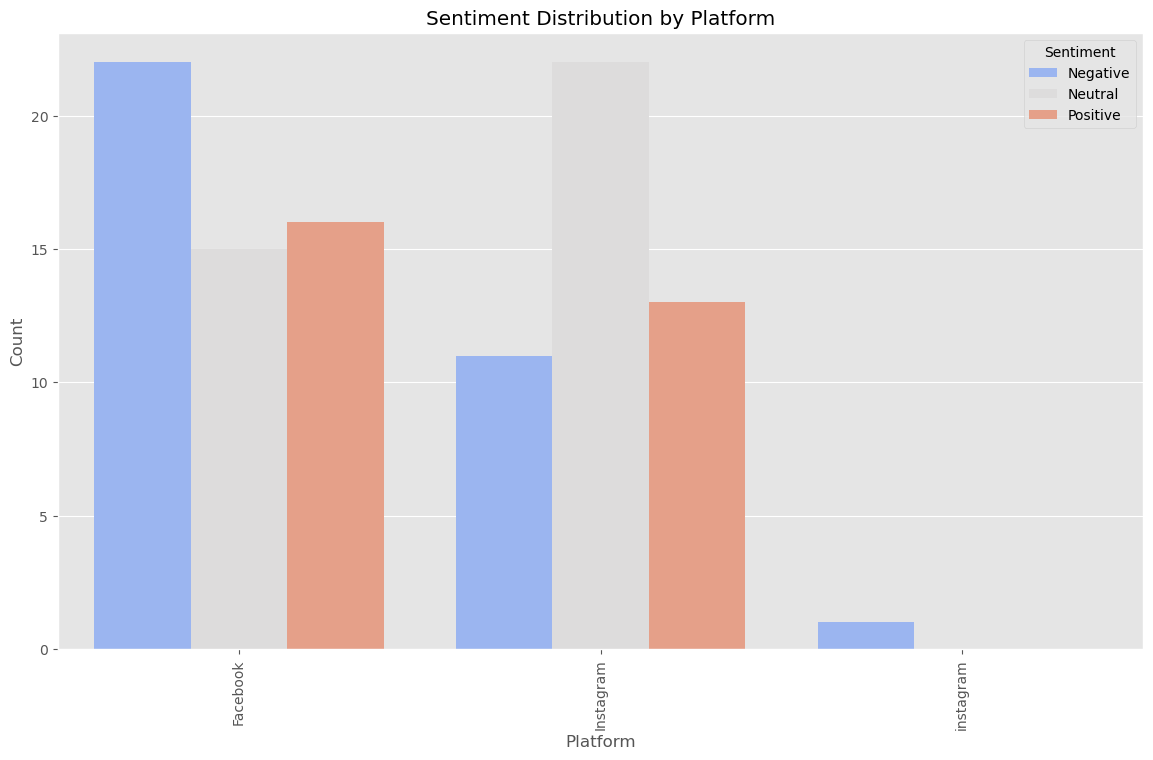

In [43]:
plt.figure(figsize=(14, 8))
sns.countplot(x='PlatformName', hue='predicted_sentiment', data=df, palette='coolwarm')
plt.xlabel('Platform')
plt.ylabel('Count')
plt.title('Sentiment Distribution by Platform')
plt.legend(title='Sentiment', loc='upper right', labels=['Negative', 'Neutral', 'Positive'])
plt.xticks(rotation=90)
plt.show()

## 3.7. Intent Distribution by Type of Case

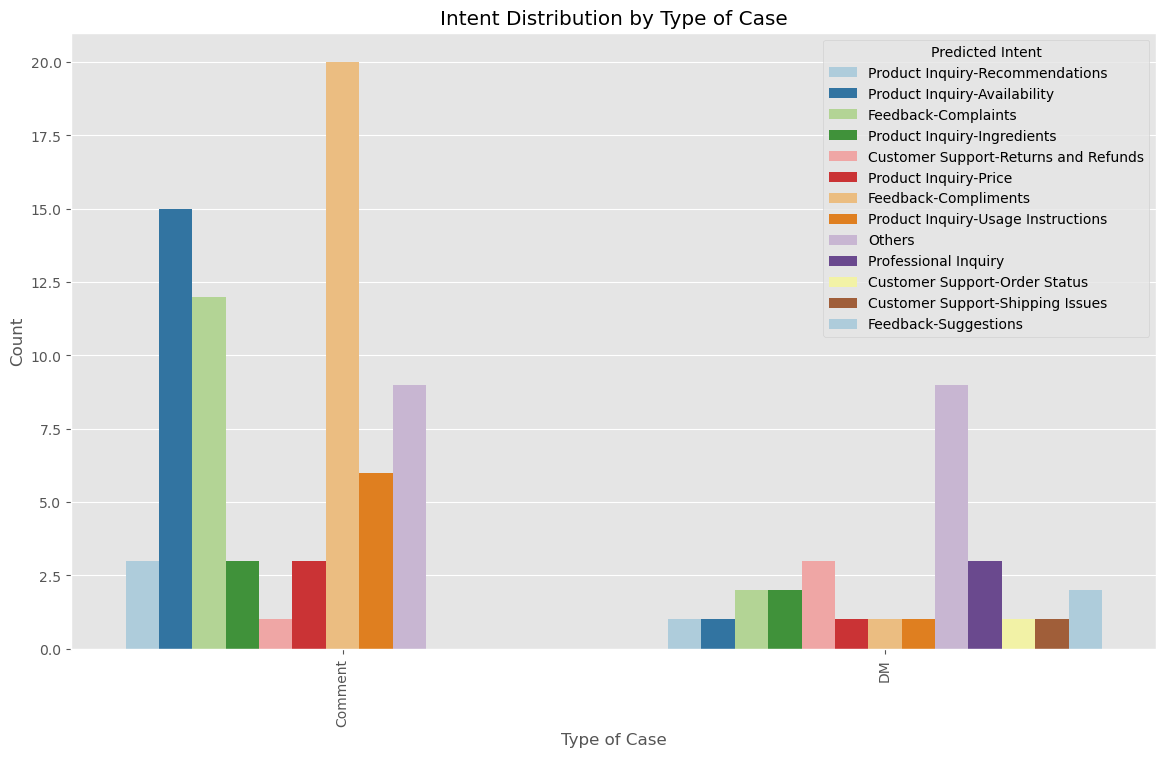

In [52]:
plt.figure(figsize=(14, 8))
sns.countplot(x='Type of case', hue='predicted_intent', data=df, palette='Paired')
plt.xlabel('Type of Case')
plt.ylabel('Count')
plt.title('Intent Distribution by Type of Case')
plt.legend(title='Predicted Intent', loc='upper right')
plt.xticks(rotation=90)
plt.show()

## 3.8. Sentiment Distribution by Type of Case

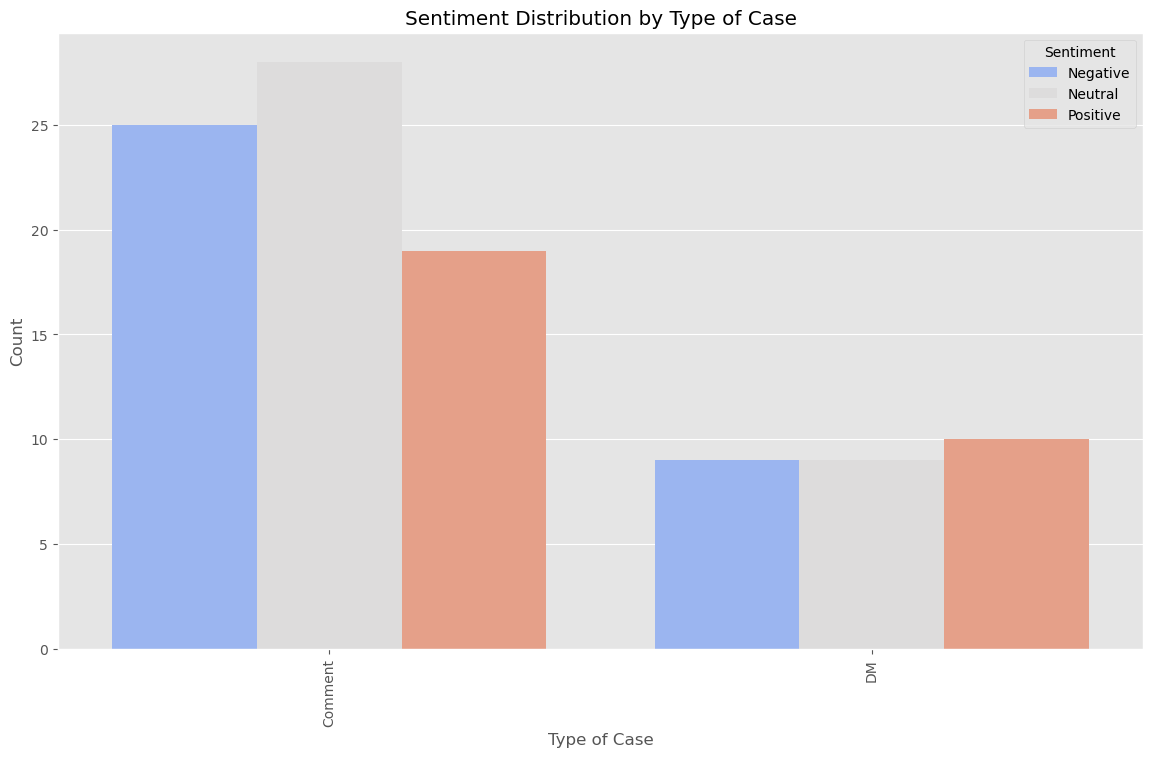

In [45]:
plt.figure(figsize=(14, 8))
sns.countplot(x='Type of case', hue='predicted_sentiment', data=df, palette='coolwarm')
plt.xlabel('Type of Case')
plt.ylabel('Count')
plt.title('Sentiment Distribution by Type of Case')
plt.legend(title='Sentiment', loc='upper right', labels=['Negative', 'Neutral', 'Positive'])
plt.xticks(rotation=90)
plt.show()

## 3.9. Intent Distribution by Brand

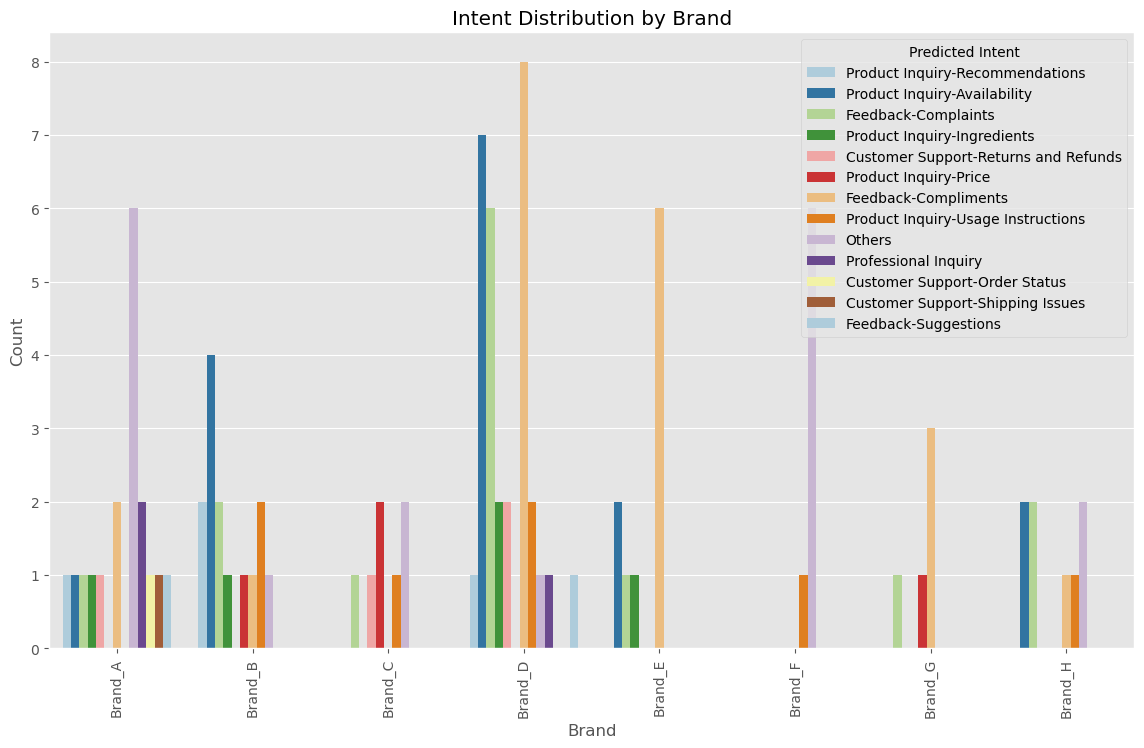

In [54]:
plt.figure(figsize=(14, 8))
sns.countplot(x='Brand', hue='predicted_intent', data=df, palette='Paired')
plt.xlabel('Brand')
plt.ylabel('Count')
plt.title('Intent Distribution by Brand')
plt.legend(title='Predicted Intent', loc='upper right')
plt.xticks(rotation=90)
plt.show()

## 3.10. Sentiment Distribution by Brand

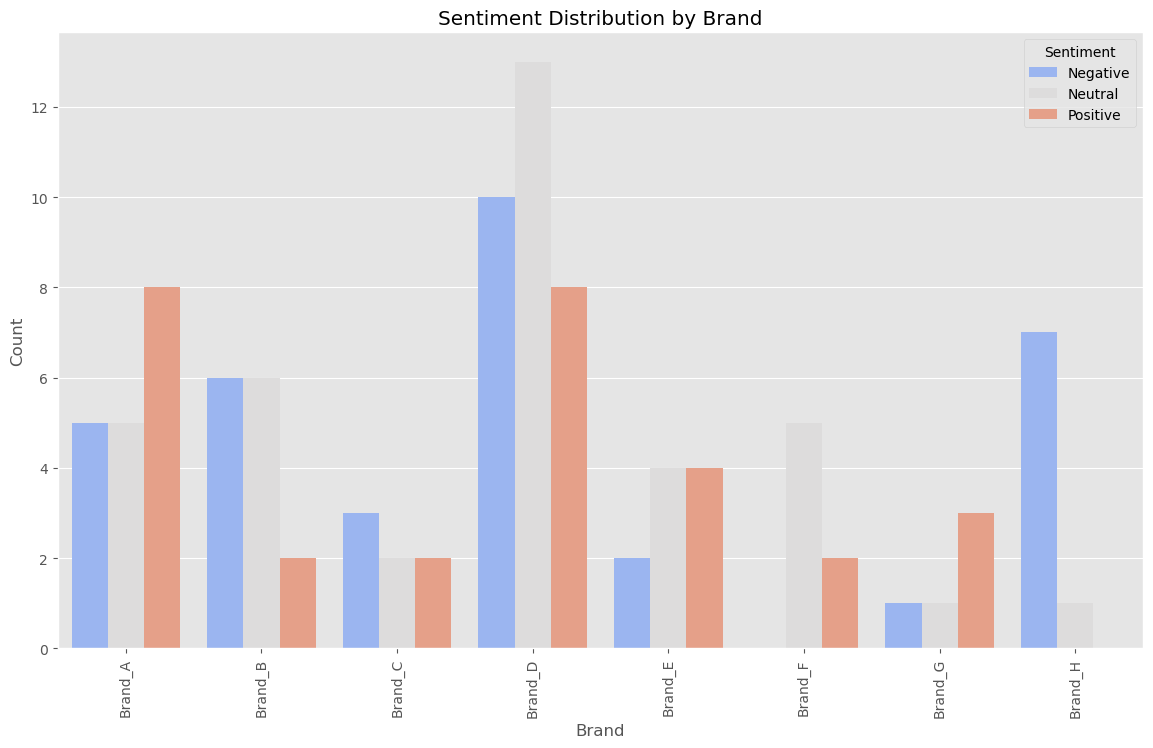

In [55]:
plt.figure(figsize=(14, 8))
sns.countplot(x='Brand', hue='predicted_sentiment', data=df, palette='coolwarm')
plt.xlabel('Brand')
plt.ylabel('Count')
plt.title('Sentiment Distribution by Brand')
plt.legend(title='Sentiment', loc='upper right', labels=['Negative', 'Neutral', 'Positive'])
plt.xticks(rotation=90)
plt.show()